(896, 1017, 3)


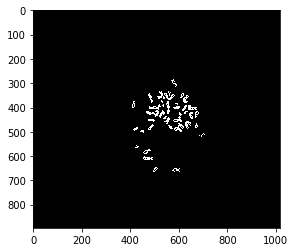

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.morphology import reconstruction, remove_small_objects, remove_small_holes

def show_image(image, name='image'):
    cv2.imshow(name,image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    

# read image
file_image = '../images/5180104844.020.A.BMP'
img = cv2.imread(file_image)
print(img.shape)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.imshow(thresh, cmap='gray')


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f971e76e198>)

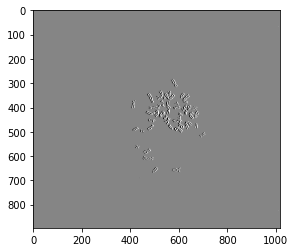

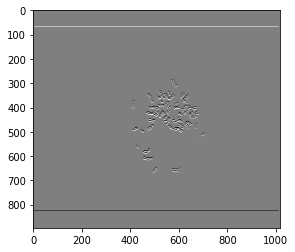

In [3]:
# Step 2: Compute Gradient Magnitude

# Use Sobel filter

# hx = np.asarray([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
# hy = np.transpose(hx)
# Ix = cv2.filter2D(gray, -1, hx)
# Iy = cv2.filter2D(gray, -1, hy)

Ix = cv2.Sobel(gray ,cv2.CV_64F,1,0,ksize=5)
Iy = cv2.Sobel(gray ,cv2.CV_64F,0,1,ksize=5)

# Show multiple images 
plt.figure(), plt.imshow(Ix, 'gray')
plt.figure(), plt.imshow(Iy, 'gray')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f971e6d39b0>)

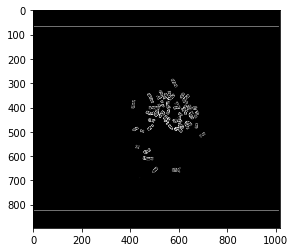

In [4]:
grad_mag = np.sqrt(Ix ** 2 + Iy ** 2, dtype=np.float64)
plt.figure(), plt.imshow(grad_mag, 'gray')
# cv2.imwrite('image/pears_gradmag.png',grad_mag)

/home/tuannm/anaconda3/envs/python3/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  selem[[slice(d, d + 1) for d in offset]] = False
/home/tuannm/anaconda3/envs/python3/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:161: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  images[[0] + inside_slices] = seed
/home/tuannm/anaconda3/envs/python3/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:162: FutureWarning: Using a non-tuple sequence for m

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f971e478390>)

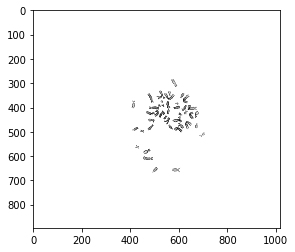

In [5]:
# Step 3: Compute foreground markers

# Opening-by-reconstruction = Erosion + Morphological reconstruction

I = gray.copy()

# Erosion
se = cv2.getStructuringElement(cv2.MORPH_ERODE, (40, 40)) # structure element
Ie = cv2.erode(I, se, iterations=1)

# Morphological reconstruction = iteratively dilation
Iobr = reconstruction(Ie, I, method='dilation')

plt.figure(), plt.imshow(Iobr, 'gray')

/home/tuannm/anaconda3/envs/python3/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  selem[[slice(d, d + 1) for d in offset]] = False
/home/tuannm/anaconda3/envs/python3/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:161: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  images[[0] + inside_slices] = seed
/home/tuannm/anaconda3/envs/python3/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:162: FutureWarning: Using a non-tuple sequence for m

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f971e456588>)

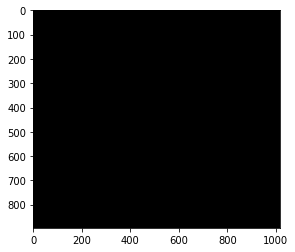

In [6]:
# Closing-by-reconstruction = Dilation + Morphological reconstruction
se = cv2.getStructuringElement(cv2.MORPH_DILATE, (40, 40)) # structure element
Iobrd = cv2.dilate(Iobr, se, iterations=1)

not_Iobrd = 255 - Iobrd # complement image
not_Iobr = 255 - Iobr

Iobrcbr = reconstruction(not_Iobrd, not_Iobr, method='dilation')
Iobrcbr = 255 - Iobrcbr

plt.figure(), plt.imshow(Iobrcbr, 'gray')
# cv2.imwrite('image/pears_openclosebrt.png', Iobrcbr)

In [20]:
def regional_maxima(image, kernel_size):
    result = np.zeros(shape=image.shape)
    radius = (int)(kernel_size - 1) / 2
    temp = image.copy()
    print(radius)
    print(temp)
    
    # temp = np.pad(temp, ((radius, radius), (radius, radius)) , 'constant')
    temp = np.pad(temp, ((radius, radius)) , 'constant')
    print(temp)
#     h, w = temp.shape
#     for i in np.arange(radius,h-radius,1):
#         for j in np.arange(radius,w-radius,1):
#             window = []
#             for p in np.arange(i-radius,i+radius+1,1):
#                 for q in np.arange(j-radius,j+radius+1,1):
#                     window.append(temp[p][q])
#             max_window = max(window)
#             if temp[i][j] == max_window:
#                 result[i-radius][j-radius] = 255
    
    return result

In [19]:
fgm = regional_maxima(Iobrcbr, 25)
plt.figure(), plt.imshow(fgm, 'gray')
# cv2.imwrite('image/pears_fgm.png', fgm)

12.0
[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]


TypeError: `pad_width` must be of integral type.